In [1]:
import sys
ars_path = "/home/boittier/pydcm/"
sys.path.insert(1, ars_path)
from _pydcm import *


In [2]:
# The Gaussian-format cube file containing electron density:
refDensCube="/data/boittier/v1/2_2_2_new.com.chk.d.cube"
# The Gaussian-format cube file containing electrostatic potential energy:
refPotCube="/data/boittier/v1/2_2_2_new.com.chk.p.cube"
# The root folder for your fitting project
projDir="/home/boittier/pydcm/models/water_2_2_2"
# The bin directory containing the MDCM scripts and programs
refBinDir="/home/boittier/pydcm/bin"
# The total charge of the molecule to be fitted (a.u.)
qtot=0.0
# The port to use for the local web browser (to view molecules in NGL). Make sure nobody else is using it already!
webPort='8887'
# The name of a Slurm partition allowing jobs to run for up to 2 hours with 4 cores
shortQ='short'
longQ='infinite'
# The desired isodensity surface to use for viewing potential energy surfaces (a.u)
isoSurf=0.001


# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=4
# Maximum number of charges to fit per atom (minimum is fixed at 1)
maxAChg=4

natm=3
nfrag = 3

minMChg=3
maxMChg=9

# Define fragments using atom numbering from NGL window at top of notebook
frags=[[1],[2],[3]]
# Minimum number of charges to fit for each fragment (can average fewer than 1 per atom)
minFChg=[1,1,1]
# Maximum number of charges to fit for each fragment (upper limit per atom fixed by maxAChg)
maxFChg=[3,3,3]

workdir = projDir + '/'
refdir = workdir + 'ref/'
htmldir = workdir + 'html/'
bindir = refBinDir + '/'
pdbfile = refdir + 'mol.pdb'
densCube = refdir + os.path.basename(refDensCube)
potCube = refdir + os.path.basename(refPotCube)

In [3]:
pydcm = Pydcm(projDir, refBinDir, refDensCube, refPotCube, webPort, frags, minFChg, maxFChg, maxAChg, minMChg, maxMChg, shortQ, longQ)

In [4]:
pydcm.make_ref_directory()
pydcm.start_server()

Changed to working directory /home/boittier/pydcm/models/water_2_2_2/
3 atoms in molecule
writing PDB file /home/boittier/pydcm/models/water_2_2_2/ref/mol.pdb

Running jobs:python /home/boittier/pydcm/bin/simple-cors-http-server.py 8887
0 : run_http()


Web server running in directory /home/boittier/pydcm/models/water_2_2_2, URLs are relative to this path
If you change the project directory, you need to restart Jupyter-Lab to restart this server and create a new root for URLs


In [5]:
pydcm.show_ref_models()

ESP range: -0.0699328 to 0.0699328 a.u.
8887 /home/boittier/pydcm/models/water_2_2_2/html/ /home/boittier/pydcm/models/water_2_2_2/ref/mol.pdb
http://localhost:8887/html/refESP.html


In [6]:
pydcm.display_mtpfit_comparison()

/home/boittier/pydcm/bin/mtpfit.py



## 1Charges Per Atom:
Atom 1 final RMSE: 2.177176086 kcal/mol
Atom 2 final RMSE: 0.6680767686 kcal/mol
Atom 3 final RMSE: 0.668052577 kcal/mol

## 2Charges Per Atom:
Atom 1 final RMSE: 1.733128659 kcal/mol
Atom 2 final RMSE: 0.3605066453 kcal/mol
Atom 3 final RMSE: 0.3604934921 kcal/mol

## 3Charges Per Atom:
Atom 1 final RMSE: 0.5975659075 kcal/mol
Atom 2 final RMSE: 0.1959470074 kcal/mol
Atom 3 final RMSE: 0.1959687665 kcal/mol

## 4Charges Per Atom:
Atom 1 final RMSE: 0.06663563969 kcal/mol
Atom 2 final RMSE: 0.07966444459 kcal/mol
Atom 3 final RMSE: 0.07967554194 kcal/mol


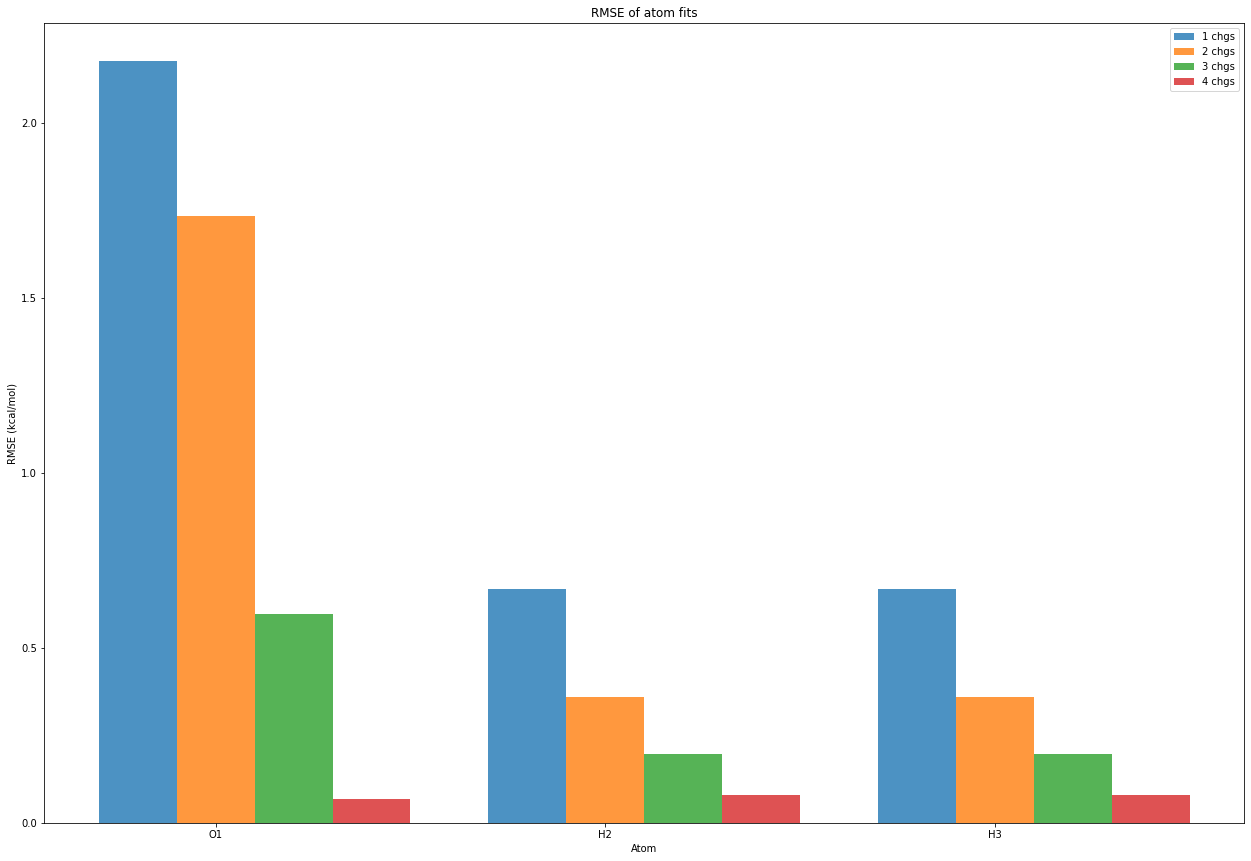

In [7]:
pydcm.do_atom_fit(maxAChg, ntry, nfrag)

Job 3551469 has crashed, resubmitting
submitted jobID 3551561
Job 3551470 has crashed, resubmitting
submitted jobID 3551562
Job 3551471 has crashed, resubmitting
submitted jobID 3551563
Job 3551472 has crashed, resubmitting
submitted jobID 3551564
Job 3551473 has crashed, resubmitting
submitted jobID 3551565
Job 3551474 has crashed, resubmitting
submitted jobID 3551566

Summary of results:
Frag 1, Fit 1, 2 charges, RMSE: 1.733128659 kcal/mol
Frag 1, Fit 1, 3 charges, RMSE: 0.5975659071 kcal/mol
Frag 1, Fit 2, 2 charges, RMSE: 1.733128659 kcal/mol
Frag 1, Fit 2, 3 charges, RMSE: 0.5975659071 kcal/mol
Frag 2, Fit 1, 2 charges, RMSE: 0.3605066454 kcal/mol
Frag 2, Fit 1, 3 charges, RMSE: 0.1959470073 kcal/mol
Frag 2, Fit 2, 2 charges, RMSE: 0.3605066453 kcal/mol
Frag 2, Fit 2, 3 charges, RMSE: 0.1959470087 kcal/mol
Frag 3, Fit 1, 2 charges, RMSE: 0.360493492 kcal/mol
Frag 3, Fit 1, 3 charges, RMSE: 0.1959687729 kcal/mol
Frag 3, Fit 2, 2 charges, RMSE: 0.3604934921 kcal/mol
Frag 3, Fit 2, 3

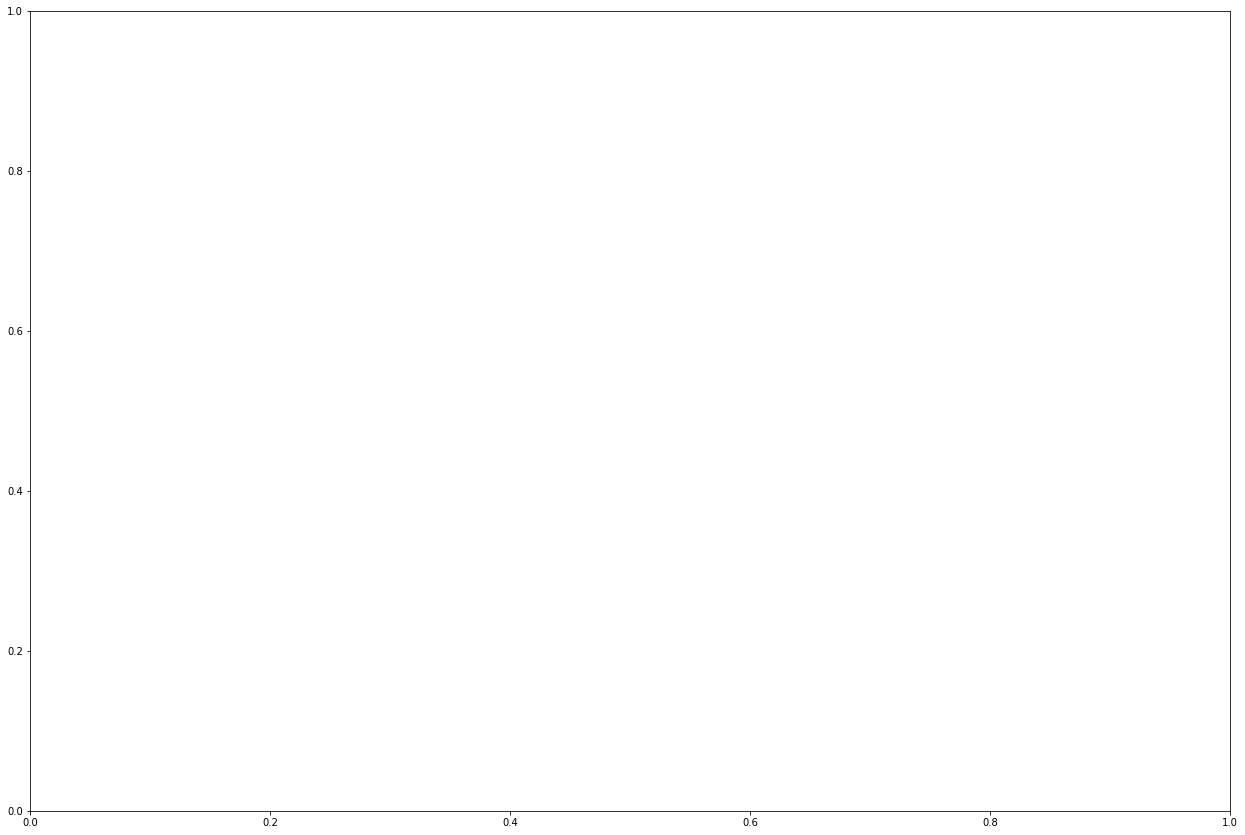

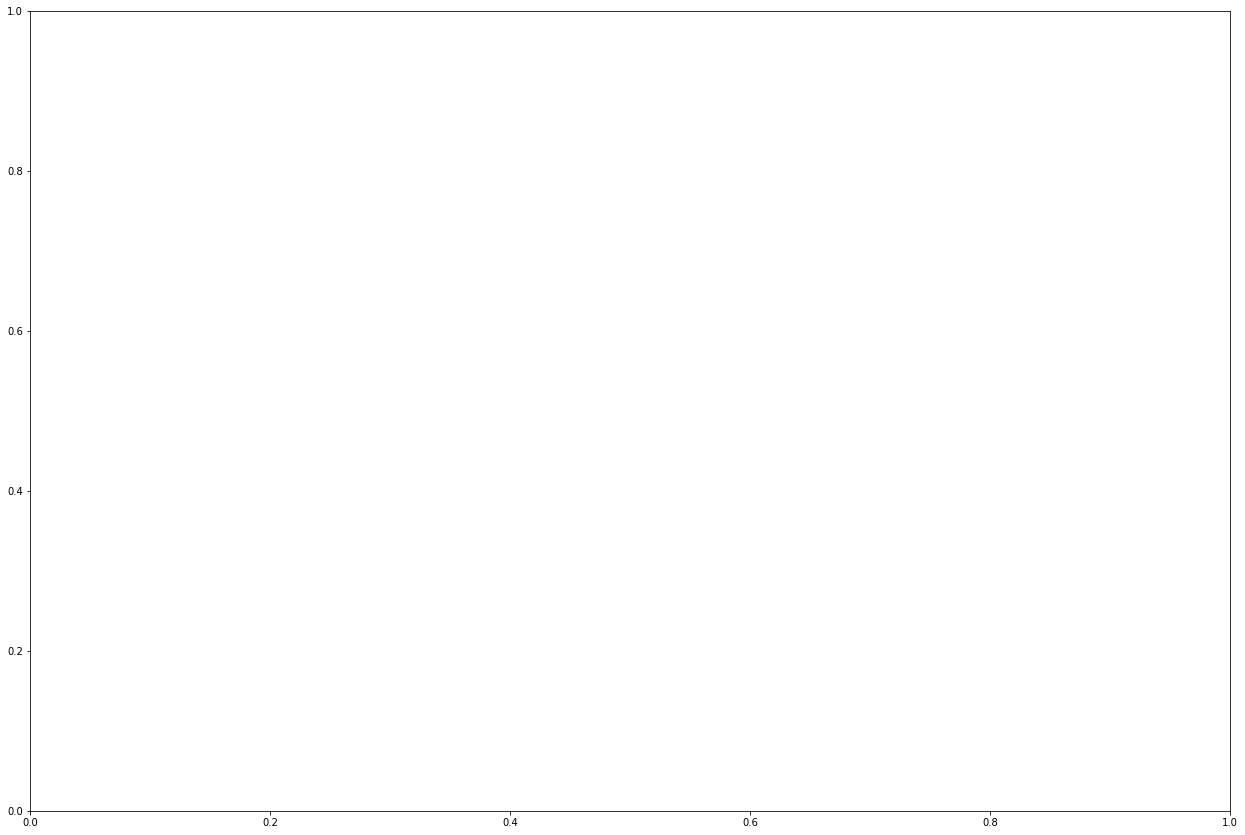

In [8]:
# Number of refinement iterations for each fit. More is better, but each fit will take longer
ntry=4
# Number of separate fits to perform (restarting a fit can lead to a better outcome). Cost scales linearly
nfit=2

pydcm.fit_fragments(ntry, nfit)

In [9]:
pydcm.combine_fragements(ntry, nfit)

3 CHARGES:
NEW BEST 3 charges: 1 1 1 rmse = 99999.0
4 CHARGES:
NEW BEST 4 charges: 1 1 2 rmse = 66666.12016449733
5 CHARGES:
NEW BEST 5 charges: 1 1 3 rmse = 66666.06532292198
NEW BEST 5 charges: 1 2 2 rmse = 33333.2403333791
6 CHARGES:
NEW BEST 6 charges: 1 2 3 rmse = 33333.185491803735
NEW BEST 6 charges: 1 3 2 rmse = 33333.18548016644
NEW BEST 6 charges: 2 2 2 rmse = 0.8180429321
7 CHARGES:
NEW BEST 7 charges: 1 3 3 rmse = 33333.130638591065
NEW BEST 7 charges: 2 2 3 rmse = 0.7632013567333332
NEW BEST 7 charges: 2 3 2 rmse = 0.7631897194333334
NEW BEST 7 charges: 3 2 2 rmse = 0.4395220148
8 CHARGES:
NEW BEST 8 charges: 2 3 3 rmse = 0.7083481440666667
NEW BEST 8 charges: 3 2 3 rmse = 0.38468043943333335
NEW BEST 8 charges: 3 3 2 rmse = 0.3846688021333334
9 CHARGES:
NEW BEST 9 charges: 3 3 3 rmse = 0.3298272267666667


Job 3551475 has crashed, resubmitting
submitted jobID 3551567
Job 3551476 has crashed, resubmitting
submitted jobID 3551568
Job 3551477 has crashed, resubmitting
submitted jobID 3551569
Job 3551478 has crashed, resubmitting
submitted jobID 3551570

Summary of results:
6 charges, RMSE: 0.7123398799 kcal/mol
7 charges, RMSE: 0.7520405529 kcal/mol
8 charges, RMSE: 0.626172718 kcal/mol


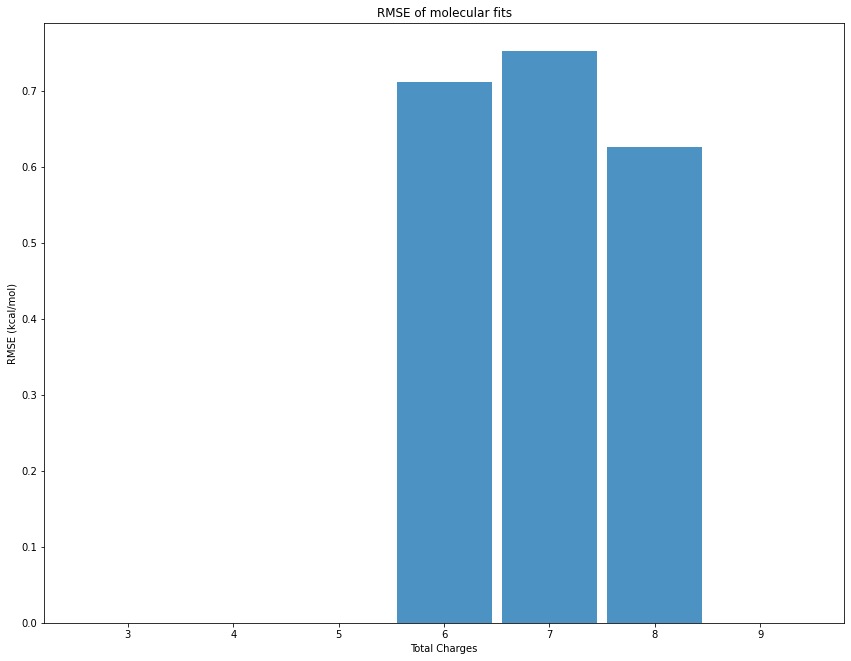

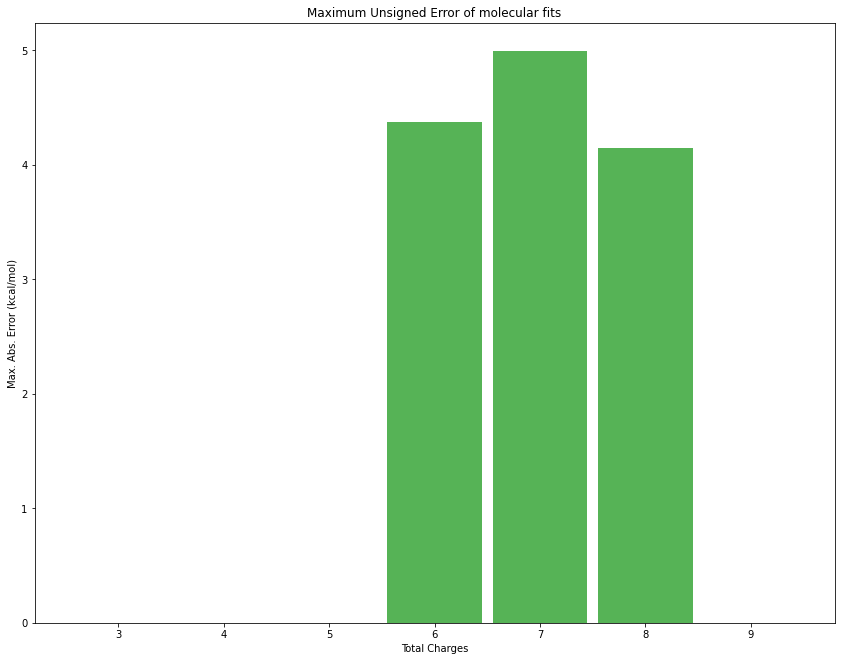

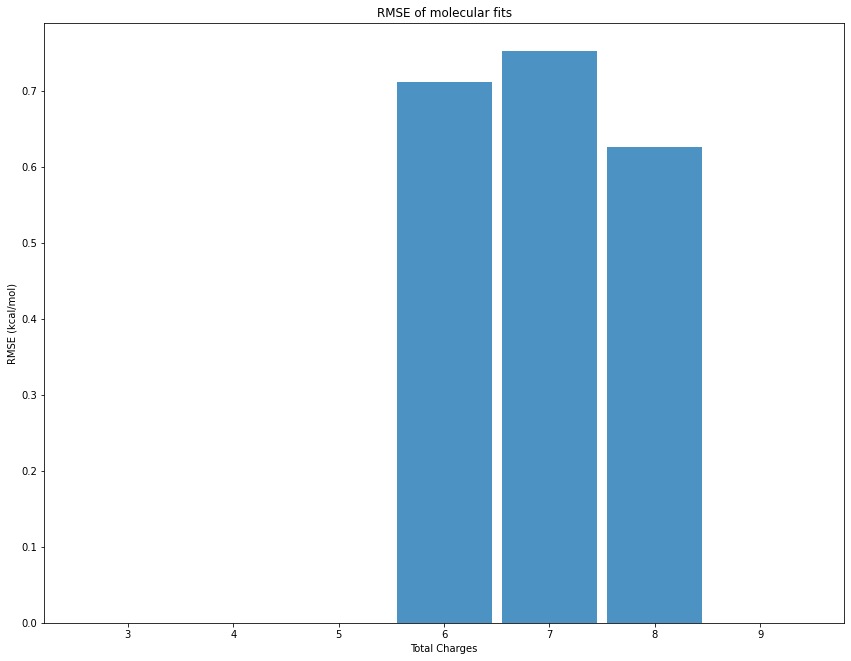

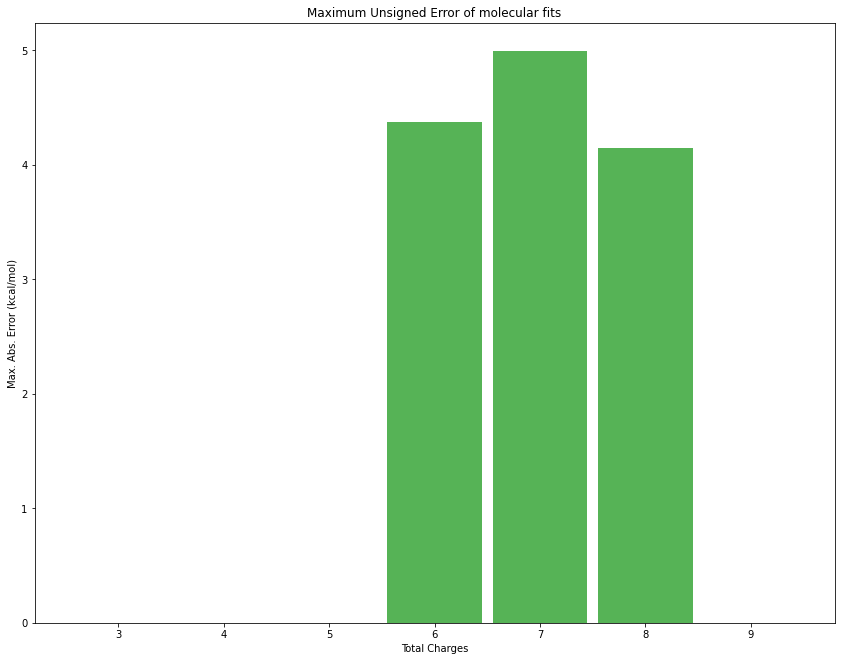

In [10]:
pydcm.refine_models()

In [11]:
pydcm.analyse_model(1)


No model found with 1 charges: file /home/boittier/pydcm/models/water_2_2_2/5-refine/1-charges/1_charges_refined.xyz is missing



FileNotFoundError: 